In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
raw_data = pd.read_csv('superbowl-ads.csv', error_bad_lines=False)
raw_data.head(10)

b'Skipping line 15: expected 4 fields, saw 5\nSkipping line 25: expected 4 fields, saw 5\nSkipping line 26: expected 4 fields, saw 5\nSkipping line 27: expected 4 fields, saw 5\nSkipping line 28: expected 4 fields, saw 5\nSkipping line 302: expected 4 fields, saw 5\nSkipping line 303: expected 4 fields, saw 5\nSkipping line 304: expected 4 fields, saw 5\nSkipping line 305: expected 4 fields, saw 5\nSkipping line 306: expected 4 fields, saw 5\nSkipping line 307: expected 4 fields, saw 5\nSkipping line 308: expected 4 fields, saw 5\nSkipping line 309: expected 4 fields, saw 5\nSkipping line 310: expected 4 fields, saw 5\nSkipping line 311: expected 4 fields, saw 5\nSkipping line 446: expected 4 fields, saw 5\nSkipping line 470: expected 4 fields, saw 5\nSkipping line 509: expected 4 fields, saw 5\nSkipping line 548: expected 4 fields, saw 5\nSkipping line 549: expected 4 fields, saw 6\nSkipping line 550: expected 4 fields, saw 6\nSkipping line 551: expected 4 fields, saw 5\nSkipping line

,Year,Product Type,Product/Title,Plot/Notes
0,1969,Car,"Chrysler ""Scuba Diver""[4]",A scuba diver in a dreamy sequence with groovy...
1,1970,Car,"Pontiac""Humbler""",A young man pulled up in his GTO to a drive-in...
2,1975,Security,"Master Lock""Rifle""",A man attempts to break a Master Lock with a r...
3,1976,Copy,"Xerox""Monks""",A monk must make 500 handwritten scriptures fo...
4,1979,Soft drink,"Coca-Cola""Hey Kid, Catch!""","A young kid tries to talk to ""Mean"" Joe Greene..."
5,1981,Camera,"Polaroid""Now with a Flash""",A couple walks in a park. The man shows that n...
6,1982,Computer,"RadioShack""Color Computer""",A commercial for the TRS-80 computer.
7,1982,Restaurant,"McDonald's""Hopscotch""",Two kids are playing hopscotch while singing t...
8,1984,Computer,"Apple Inc.""1984""",In what some call the greatest Super Bowl comm...
9,1984,Computer,"Atari""Get Started""",NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 4 columns):
Year             540 non-null object
Product Type     540 non-null object
Product/Title    539 non-null object
Plot/Notes       525 non-null object
dtypes: object(4)
memory usage: 17.0+ KB


In [6]:
raw_data.describe()

,Year,Product Type,Product/Title,Plot/Notes
count,540,540,539,525
unique,36,68,537,406
top,2018,Film,Advertiser/Product Title,TV promo.
freq,74,140,3,94


In [8]:
raw_data.isnull().sum()

Year              0
Product Type      0
Product/Title     1
Plot/Notes       15
dtype: int64

In [9]:
data = raw_data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 537
Data columns (total 4 columns):
Year             524 non-null object
Product Type     524 non-null object
Product/Title    524 non-null object
Plot/Notes       524 non-null object
dtypes: object(4)
memory usage: 20.5+ KB


In [15]:
data['Product Type'].value_counts().nlargest(15)

Film           135
Car             71
Beer            46
Website         44
Food            36
Soft drink      25
TV series       19
Wireless        13
Restaurant       8
Sports           7
Candy            7
Credit card      7
Alcohol          6
Mail             5
Gaming           5
Name: Product Type, dtype: int64

In [16]:
data['Year'].value_counts().nlargest(15)

2018    71
2015    54
2019    38
2017    37
2010    37
2000    35
2016    26
1998    23
1999    23
2009    21
2011    17
2005    15
2012    15
2004    15
2001    14
Name: Year, dtype: int64

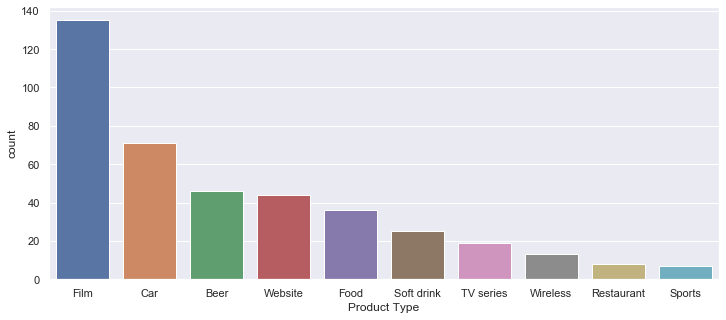

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x='Product Type', data=data, order=data['Product Type'].value_counts().iloc[:10].index)

In [21]:
data['Company'] =data['Product/Title'].apply(lambda x: x.split("\"")[0])
data

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Product Type,Product/Title,Plot/Notes,Company
0,1969,Car,"Chrysler ""Scuba Diver""[4]",A scuba diver in a dreamy sequence with groovy...,Chrysler
1,1970,Car,"Pontiac""Humbler""",A young man pulled up in his GTO to a drive-in...,Pontiac
2,1975,Security,"Master Lock""Rifle""",A man attempts to break a Master Lock with a r...,Master Lock
3,1976,Copy,"Xerox""Monks""",A monk must make 500 handwritten scriptures fo...,Xerox
4,1979,Soft drink,"Coca-Cola""Hey Kid, Catch!""","A young kid tries to talk to ""Mean"" Joe Greene...",Coca-Cola
...,...,...,...,...,...
529,2020,Car,"Jeep """"""Groundhog Day"""""" ""Groundhog Day commer...",meeting with Punxsutawney Phil again as he is...,Jeep
530,2020,Car,"Kia Seltos """"""Tough Never Quits"""""" ""Rookie Jos...",Oklahoma offering advice and inspiration to h...,Kia Seltos
531,2020,Car,"Porsche Taycan """"""The Heist"""""" ""Security profe...","a 917 K and a 918 Spyder.[227]""",Porsche Taycan
536,2020,Food,"Planters """"""Tribute"""""" ""Following his death in...",Mr. Peanut returns to life as a newborn child...,Planters


In [23]:
data['Company'].value_counts().nlargest(15)

Budweiser     20
Pepsi         16
Bud Light     13
T-Mobile      13
Doritos       10
E*Trade        8
Bud Light      6
Audi           5
Toyota         5
FedEx          5
Doritos        4
Jeep           4
TurboTax       4
Coca-Cola      4
McDonald's     4
Name: Company, dtype: int64

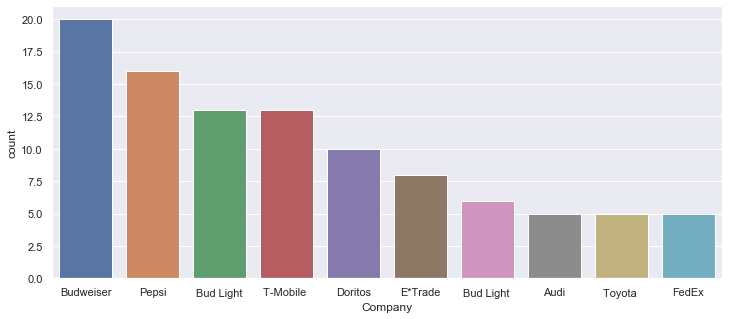

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x='Company', data=data, order=data['Company'].value_counts().iloc[:10].index)